In [1]:
import numpy as np
from functools import partial
import sobol_seq

**Problem 1 Mastorakis**

In [2]:
def objective_function(x):
    f1 = (x[0]**2+x[0]*x[1]-6)
    f2 = (x[0]**2+x[1]**3+2*x[0]*x[1]**2-3)
    return np.array([f1,f2])

dim = 2
boundaries = np.array([(-10,10) for _ in range (dim)])
pop_size=1000
max_gen=100
F_init=0.5
CR_init=0.5
num_l=20
theta=1e-3
tau_d=0.4
s_max=100
print_gen=True
Hm = 50


**Problem 1 Pak Kun**

In [3]:
# def objective_function(x):
#     f1 = np.exp(x[0]-x[1])-np.sin(x[0]+x[1])
#     f2 = (x[0]*x[1])**2-np.cos(x[0]+x[1])
#     return np.array([f1,f2])

# dim = 2
# boundaries = np.array([(-10,10) for _ in range (dim)])
# pop_size=100
# max_gen=1000
# F_init=0.5
# CR_init=0.5
# num_l=20
# theta=1e-3
# tau_d=0.4
# s_max=100
# print_gen=True
# Hm = 50


**Problem 2 Pak Kun**

In [4]:
# def objective_function(x):
#     f1 = 0.5*np.sin(x[0]*x[1])-0.25*x[1]/np.pi - 0.5*x[0]
#     f2 = (1-0.25/np.pi)*(np.exp(2*x[0])-np.exp(1))+np.exp(1)*x[1]/np.pi - 2*np.exp(1)*x[0]
#     f_list = [f1,f2]
#     return f_list

# dim = 2
# # boundaries = np.array([(-5,5) for _ in range (dim)])
# boundaries = np.array([(-1,3),(-17,4)])
# pop_size=500
# max_gen=200
# F_init=0.5
# CR_init=0.5
# num_l=20
# theta=1e-2
# tau_d=0.4
# s_max=100
# print_gen=True
# Hm = 50

# Objective Function

In [3]:
def root_objective_function(x:np.ndarray):
    res = 0
    F_array = objective_function(x)
    for f in F_array:
        res +=(f)**2
    return res

# def root_objective_function(x:np.ndarray):
#     F_array = objective_function(x)
#     denom = 0
#     for f in F_array:
#         denom += np.abs(f)
#     res = 1/(1+denom)
#     return -res

In [4]:
import rdeal as rd
import importlib
import time
from tqdm import tqdm
importlib.reload(rd)

time_elapsed = [] # time elapsed
seed_archive = []
archiveB = [] # the root(s) found
archiveC = [] # how many roots found
archiveD = [] # best solution

for i in tqdm(range(50), desc="Processing"):

    start = time.time()

    M_CR = np.ones(Hm)*CR_init
    M_F = np.ones(Hm)*F_init
    archiveA = []
    seed = np.random.randint(0,100)
    best_solution, best_fitness, archiveA= rd.RADE(objective_func=root_objective_function, 
                                                archive=archiveA,
                                                bounds = boundaries, 
                                                population_size=pop_size, 
                                                max_generation=max_gen, 
                                                memories_F=M_F, 
                                                memories_CR=M_CR,
                                                num_l=num_l,
                                                theta=theta,
                                                tau_d=tau_d,
                                                seed=seed,
                                                archive_size_max=s_max,
                                                print_gen=False)

    end = time.time()
    seed_archive.append(seed)
    time_elapsed.append(end - start)
    archiveB.append(archiveA)
    archiveC.append(len(archiveA))
    archiveD.append(best_fitness)
# print("Best Solution:", best_solution)
# print("Best Fitness:", best_fitness)
# print(f'Roots: {archiveA}')

# print(f"Execution time: {end - start} seconds.")

archiveC = np.array(archiveC)
archiveD = np.array(archiveD)
time_elapsed = np.array(time_elapsed)
seed_archive = np.array(seed_archive)

Processing: 100%|██████████| 50/50 [16:08<00:00, 19.38s/it]


In [7]:
print('STATISTIC')
print('__________')
# print(f'Mean banyak akar: {archiveC.mean()}')
# print(f'Std banyak akar: {archiveC.std()}')
# print(f'Max banyak akar: {archiveC.max()}')
# print(f'Min banyak akar: {archiveC.min()}')
# print(f'Mean solusi terbaik: {archiveD.mean()}')
# print(f'Std solusi terbaik: {archiveD.std()}')
# print(f'Max solusi terbaik: {archiveD.min()}')
# print(f'Min solusi terbaik: {archiveD.max()}')
# print(f'Mean time elapsed: {time_elapsed.mean()}')
# print(f'Std time elapsed: {time_elapsed.std()}')
# print(f'Best time elapsed: {time_elapsed.min()}')
# print(f'Worst time elapsed: {time_elapsed.max()}')

print(f'{archiveC.mean()}')
print(f'{archiveC.std()}')
print(f'{archiveC.max()}')
print(f'{archiveC.min()}')
print(f'{archiveD.mean()}')
print(f'{archiveD.std()}')
print(f'{archiveD.min()}')
print(f'{archiveD.max()}')
print(f'{time_elapsed.mean()}')
print(f'{time_elapsed.std()}')
print(f'{time_elapsed.min()}')
print(f'{time_elapsed.max()}')

STATISTIC
__________
0.02
0.13999999999999999
1
0
0.005909437095863778
0.0026815441393875
0.0001866642017029333
0.01380320145099671
10.396984601020813
0.9313039941019288
9.724770307540894
15.034183263778687


In [8]:
# importlib.reload(rd)
# archiveA = []
# best_solution, best_fitness, archiveA, history_root= rd.RADE(objective_func=root_objective_function, 
#                                             archive=archiveA,
#                                             bounds = boundaries, 
#                                             population_size=pop_size, 
#                                             max_generation=max_gen, 
#                                             memories_F=M_F, 
#                                             memories_CR=M_CR,
#                                             num_l=num_l,
#                                             theta=theta,
#                                             tau_d=tau_d,
#                                             archive_size_max=s_max,
#                                             seed=8,
#                                             print_gen=True,
#                                             root_history=True)
# history_root_count = []
# for key, objects in history_root.items():
#     history_root_count.append(len(objects))
# history_root_count

In [9]:
# import matplotlib.pyplot as plt

# # Example data (replace this with your actual data)
# generations = list(range(1, 5))  # Generation numbers 1 to 100
# roots_found = [3, 7, 10, 15]  # Number of roots found in each generation

# # Create the plot
# plt.plot(generations, roots_found, marker='o', linestyle='-')

# # Customize the plot
# plt.xlabel('Generation')
# plt.ylabel('Number of Roots Found')
# plt.title('Number of Roots Found in Each Generation')

# # Show the plot or save it to a file
# plt.show()


Visualization

C:\Users\ACER\AppData\Local\Temp\ipykernel_17276\182280406.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  contour1 = plt.contour(x1, x2, f1, levels=[0], colors='r', label='f1(x1, x2) = 0')
C:\Users\ACER\AppData\Local\Temp\ipykernel_17276\182280406.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  contour2 = plt.contour(x1, x2, f2, levels=[0], colors='b', label='f2(x1, x2) = 0')


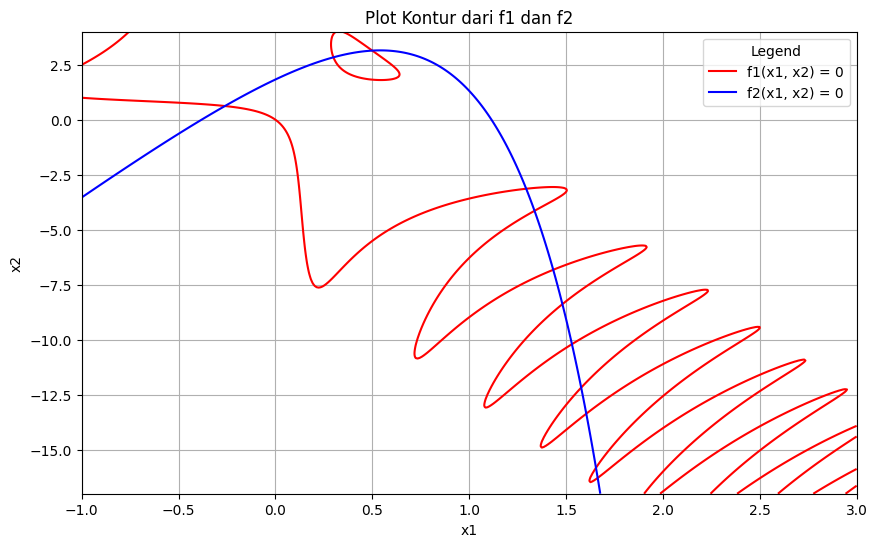

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for x1 and x2 based on the domain D
x1_range = np.linspace(-1, 3, 400)
x2_range = np.linspace(-17, 4, 400)

# Create meshgrid for plotting
x1, x2 = np.meshgrid(x1_range, x2_range)

# Define the functions
f1 = 0.5*np.sin(x1*x2)-0.25*x2/np.pi - 0.5*x1
f2 = (1-0.25/np.pi)*(np.exp(2*x1)-np.exp(1))+np.exp(1)*x2/np.pi - 2*np.exp(1)*x1

# Create a figure to plot both functions
plt.figure(figsize=(10, 6))

# Plot f1 contours in red
contour1 = plt.contour(x1, x2, f1, levels=[0], colors='r', label='f1(x1, x2) = 0')

# Plot f2 contours in blue
contour2 = plt.contour(x1, x2, f2, levels=[0], colors='b', label='f2(x1, x2) = 0')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot Kontur dari f1 dan f2')
legend1 = plt.Line2D([0], [0], linestyle='-', color='r', label='f1(x1, x2) = 0')
legend2 = plt.Line2D([0], [0], linestyle='-', color='b', label='f2(x1, x2) = 0')
plt.legend(handles=[legend1, legend2], loc='upper right', title='Legend')

# Display the plot
plt.grid()
plt.show()